### **Bike Sharing**

[Sumber data Bike Sharing ](http://capitalbikeshare.com/system-data
) 

### **Contents**

1. Business Problem Understanding
2. Project Flow:
    - Data Understanding / Data Preparation
    - EDA
    - Feature Engineering
    - Pre processing Data
    - Model Implementation
    - Model Explainability
3. Conclusion
4. Recomendation

****

# **Business Problem Understanding**

## **Context**  

Sistem Bike-Sharing adalah persewaan sepeda tradisional di mana seluruh proses, mulai dari keanggotaan, persewaan, dan pengembalian, telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi di posisi lain. Saat ini, terdapat lebih dari 500 program Bike Sharing di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda.   

Saat ini, minat besar ada pada sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan, dan kesehatan.
Terlepas dari aplikasi dunia nyata yang menarik dari sistem Bike Sharing, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Tidak seperti layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, keberangkatan, dan posisi kedatangan dicatat secara eksplisit dalam sistem ini.   

Fitur ini mengubah sistem bike-sharing menjadi jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di dalam kota. Oleh karena itu, diharapkan peristiwa terpenting di kota dapat dideteksi dengan memantau data ini.

## **Problem Statement**  

Saat ini penyewaan bike-sharing diperkenalkan di banyak kota perkotaan untuk peningkatan kenyamanan mobilitas. Penting untuk membuat sepeda sewaan tersedia dan dapat diakses oleh publik pada waktu yang tepat karena mengurangi waktu tunggu. Bagian penting adalah prediksi jumlah sepeda yang dibutuhkan setiap jam untuk pasokan sepeda sewaan yang stabil.

Jika jumlah unit tidak tercukupi, maka akan berdampak kepada hilangnya kepercayaan atau menurunnya jumlah pelanggan. Kehilangan pelanggan berarti menurunnya profit bagi perusahaan. Namun apabila jumlah ketersediaan sepeda terlalu banyak, maka akan menyebabkan ketidakefisienan operasi bisnis

## **Action, & Value**
**Action:**  
Mengalokasikan jumlah sepeda yang sesuai dengan kondisi dengan hasil prediksi  

**Value**  
Perusahaan bike-sharing dapat memiliki tingkat efisiensi dalam operasional bisnisnya.

## **Analytics Approach**
Melakukan analisa terhadap data untuk dapat menemukan pola dari fitur-fitur yang tersedia. Diantaranya membedakan satu kondisi dengan kondisi yang lain & bagaimana setiap kondisi mempengaruhi jumlah pasokan sepeda yang tersedia. Selanjutnya akan dibuat model regresi yang bertujuan untuk menentukan jumlah unit sepeda yang perlu disediakan oleh perusahaan

## **Evaluation Matrics**
Evaluasi metrik yang akan digunakan adalah MAE, MAPE, dan R-Squared. Semakin mendekati nol nilai MAE, MAPE, dan R-Squared yang dihasilkan, berarti model semakin akurat dalam memprediksi total penyewa sesuai dengan limitasi fitur yang digunakan.  

MAE adalah metrik sederhana yang menghitung selisih absolut antara hasil aktual dan hasil prediksi, cocok digunakan jika Y memiliki variance yang kecil, dan terdapat banyak outliers pada residual.  

MAPE adalah rataan persentase error yang dihasilkan oleh model regresi, cocok digunakan jika ingin mengukur performa model berdasarkan error relative dan dapat digunakan untuk data dengan banyak outliers.  

R-Squared digunakan untuk melihat seberapa signifikan variabel independen mempengaruhi variabel dependen.


****

# **Data Understanding**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Tanggal |
| hum | float64 | Kelembaban / humidity yang dinormalisasi. Values dibagi 100 |
| weathersit | int64  | cuaca(*) |
| holiday | int64 | Libur / tidak libur |
| season | int64 | season (1: winter, 2: spring, 3: summer, 4: fall) |
| temp | float64 | Temperatur dalam celcius |
| atemp | float64 | Normalisasi feeling dalam celcius |
| hr | int64 | hour / jam (0 - 23) |
| casual | int64 | jumlah casual users |
| registered | int64 | jumlah registered users |
| cnt | int64 | Jumlah pengguna (casual&registered) |


(*) 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  



### **Initial Preparations**

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')

# Melihat 5 baris teratas dan terbawah dari data
display(df.head(), df.tail())

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69
12164,2011-04-28,0.47,1,0,2,0.6212,0.64,18,44,486,530


In [3]:
#Bentuk data
df.shape

(12165, 11)

Data memiliki 12.165 baris dan 11 kolom

In [4]:
df.describe(include='all')

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,NaN,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,NaN,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,NaN,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000


## **Conclusion :**
1. Data kategorikal :
    - weathersit (cuaca)
    - holiday (musim liburan / tidak)
    - season (musim : (1)winter, (2) spring, (3)summer, (4) fall)
2. Data numerikal : 
    - dteday (tanggal)
    - hum
    - atemp
    - temp
    - hr 
    - casual
    - registered
    - count


****

# **EDA**

In [5]:
# Membuat fungsi Return untuk unique values pada setiap kolom kategorikal
def cat_unique_val(cat_cols,df):
  for col in cat_cols:
    print('Unique value dari kolom kategorikal',col,'adalah',df[col].unique())


In [6]:
kolom_kategori = ['weathersit','holiday','season']
cat_unique_val(kolom_kategori,df)

Unique value dari kolom kategorikal weathersit adalah [1 2 3 4]
Unique value dari kolom kategorikal holiday adalah [0 1]
Unique value dari kolom kategorikal season adalah [4 2 3 1]


In [7]:
#Membuat fungsi untuk mengelompokan beberapa data kategorikal berdasarkan count
def cat_group_val (col):
    return df.groupby(col)['cnt'].sum().reset_index()

In [8]:
#Kolom Season
season_col = cat_group_val('season')
season_col_df = pd.DataFrame(season_col)
season_col_df['season_type'] = ['winter','spring','summer','fall']
season_col_df

,season,cnt,season_type
0,1,334839,winter
1,2,639704,spring
2,3,742488,summer
3,4,585451,fall


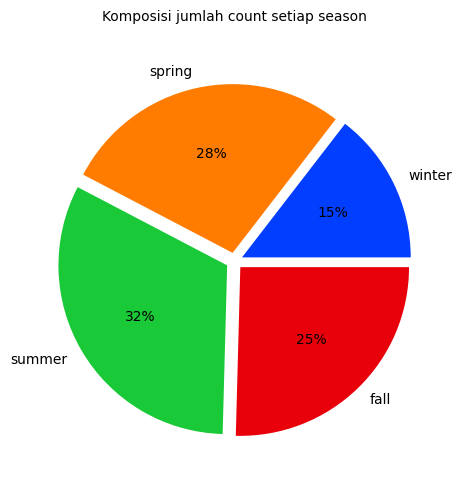

In [9]:
#Membuat pie chart season dengan persentase
seasons_list = list(season_col_df['season_type']) 
rented_count_list = list(season_col_df['cnt'])
palette_color = sn.color_palette('bright')
explode = (0.05,0.05,0.05,0.05)

plt.figure(figsize=(5,6))
plt.pie(rented_count_list,labels=seasons_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Komposisi jumlah count setiap season",size=10)
plt.axis("equal")  
plt.show()

**Berdasarkan data tersebut, diketahui *Season Summer* merupakan musim yang memiliki jumlah penyewaan sepeda tertinggi. Hal tersebut dapat disebabkan oleh tingginya wisatawan yang berlibur saat musim panas / summer. Sedangkan *Season Winter* memiliki persentase terkecil yaitu sebesar 15%. Hal tersebut mungkin disebabkan karena kondisi cuaca yang tidak bersahabat untuk bersepeda**

In [10]:
#Kolom holiday
holiday_col = cat_group_val('holiday')
holiday_col_df = pd.DataFrame(holiday_col)
holiday_col_df['holiday_type'] = ['Not Holiday','Holiday']
holiday_col_df

,holiday,cnt,holiday_type
0,0,2245297,Not Holiday
1,1,57185,Holiday


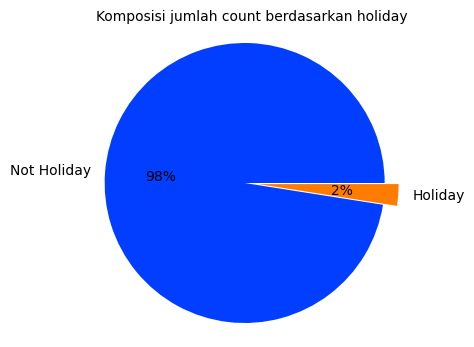

In [11]:
#Membuat pie chart season dengan persentase
holiday_list = list(holiday_col_df['holiday_type']) 
holiday_count_list = list(holiday_col_df['cnt'])
palette_color = sn.color_palette('bright')
explode = (0.05,0.05)

plt.figure(figsize=(4,4))
plt.pie(holiday_count_list,labels=holiday_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Komposisi jumlah count berdasarkan holiday",size=10)
plt.axis("equal")  
plt.show()

**Berdasarkan data di atas, diketahui bahwa mayoritas pengguna sepeda menyewa pada hari tidak libur, yaitu 98% data**

In [12]:
#Kolom Weathersit
weather_col = cat_group_val('weathersit')
weather_col_df = pd.DataFrame(weather_col)
weather_col_df['weather_type'] = ['clear','mist','light','heavy']
weather_col_df

,weathersit,cnt,weather_type
0,1,1655713,clear
1,2,532819,mist
2,3,113727,light
3,4,223,heavy


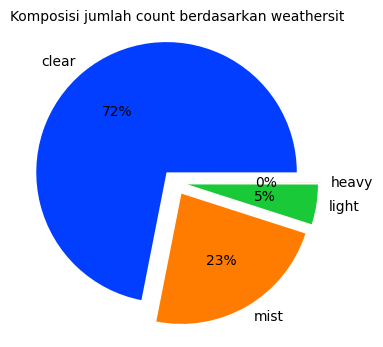

In [13]:
#Membuat pie chart season dengan persentase
weather_list = list(weather_col_df['weather_type']) 
weather_count_list = list(weather_col_df['cnt'])
palette_color = sn.color_palette('bright')
explode = (0.1,0.1,0.1,0.1)

plt.figure(figsize=(4,4))
plt.pie(weather_count_list,labels=weather_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Komposisi jumlah count berdasarkan weathersit",size=10)
plt.axis("equal")  
plt.show()

**Berdasarkan data di atas, diketahui jumlah penyewa sepeda saat cuaca dalam kategori 'Heavy' sebanyak 0%. Hal ini dapat disebabkan oleh keadaan cuaca yang tidak bersahabat untuk menggunakan sepeda. Dalam data ini, cuaca 'Heavy' meliputi  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog** 

Text(0.5, 1.0, 'Jumlah sewa terhadap temperatur')

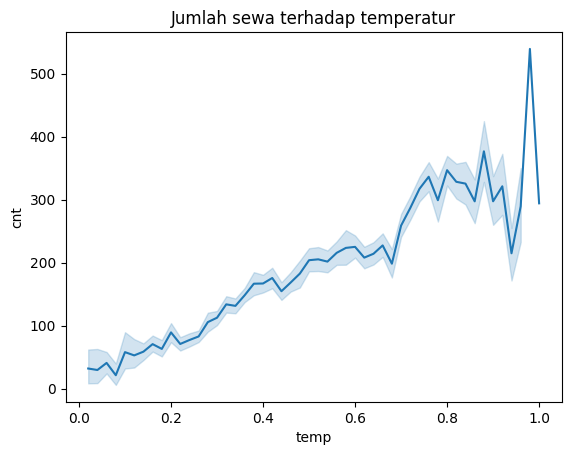

In [14]:
#Membuat visualisasi berdasarkan temperatur dan count
sn.lineplot(data=df,x='temp',y='cnt')
plt.title('Jumlah sewa terhadap temperatur')


**Berdasarkan data di atas, Jumlah orang yang menyewa sepeda semakin meningkat diiringi kenaikan temperatur**

Text(0.5, 1.0, 'Jumlah sewa terhadap kelembaban')

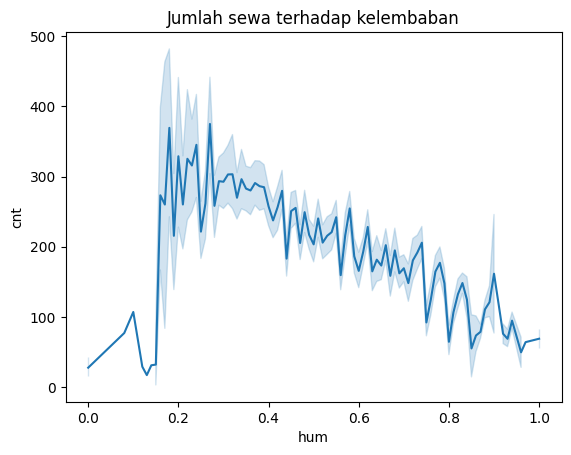

In [15]:
sn.lineplot(data=df,x='hum',y='cnt')
plt.title('Jumlah sewa terhadap kelembaban')

**Berdasarkan data di atas, jumlah orang yang menyewa sepeda semakin berkurang diiringi oleh kenaikan humidity/kelembaban**

Text(0.5, 1.0, 'Jumlah sewa terhadap atemp')

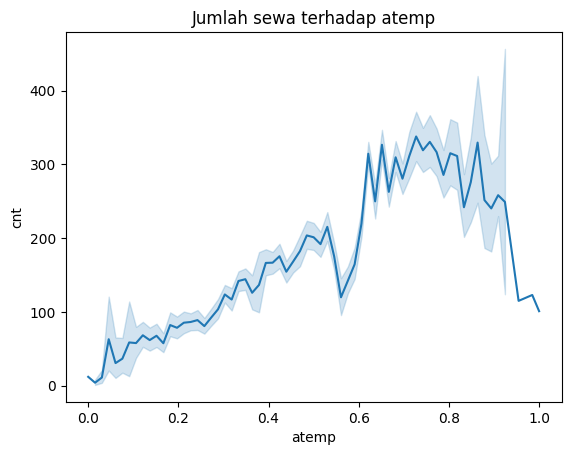

In [16]:
sn.lineplot(data=df,x='atemp',y='cnt')
plt.title('Jumlah sewa terhadap atemp')

<AxesSubplot: title={'center': 'Jumlah sewa terhadap jam'}, xlabel='hr', ylabel='cnt'>

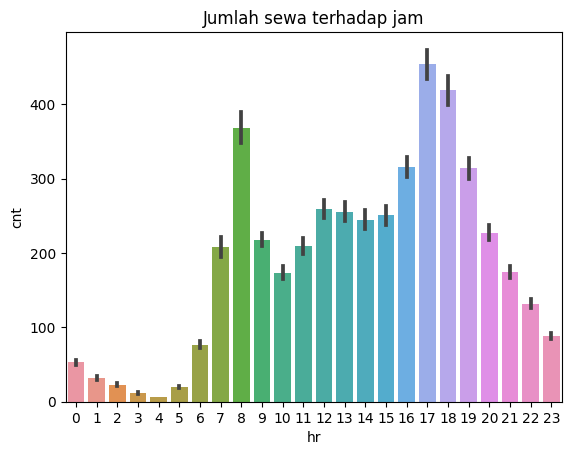

In [17]:
plt.title('Jumlah sewa terhadap jam')
sn.barplot(data=df,x='hr',y='cnt')

**Berdasarkan data di atas, jumlah orang yang menyewa sepeda tertinggi terdapat pada rentang waktu 7-18. Di mana angka tertinggi adalah jam 17, kedua adalah 18, ketiga adalah 8. Hal ini dapat disebabkan karena penggunaan bike-sharing sebagai alat transportasi untuk pergi&pulang aktifitas perkantoran/pekerjaan**

array([[<AxesSubplot: title={'center': 'hum'}>,
        <AxesSubplot: title={'center': 'atemp'}>,
        <AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'cnt'}>,
        <AxesSubplot: title={'center': 'casual'}>],
       [<AxesSubplot: title={'center': 'registered'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

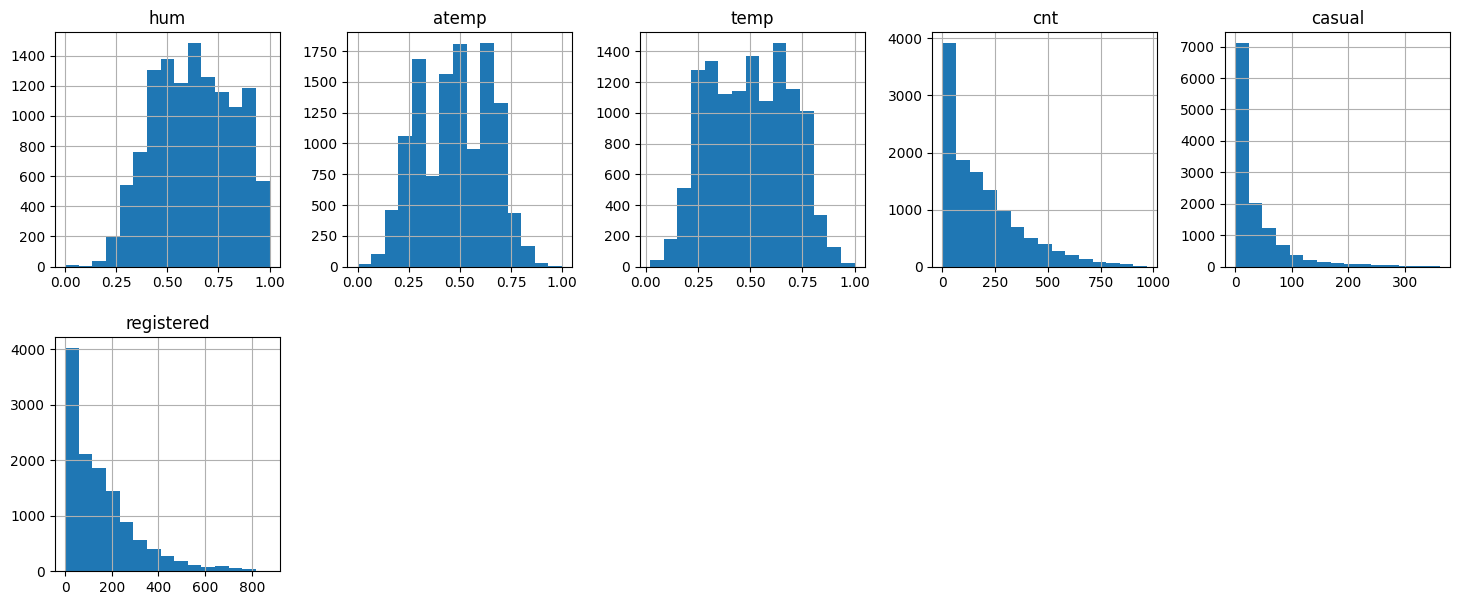

In [18]:
#Histogram data numerikal
numerik = df[['hum','atemp','temp','cnt','casual','registered']]
numerik.hist(bins=15, figsize=(18,7), layout=(2,5))


****

# **Feature Engineering**

## **Handling Null Values:**
Data yang hilang didefinisikan sebagai nilai atau data yang tidak disimpan (atau tidak ada) untuk beberapa variabel dalam kumpulan data yang diberikan.

Nilai yang hilang dapat membiaskan hasil model pembelajaran mesin dan/atau mengurangi akurasi model.

Oleh karena itu, penting untuk menangani nilai null sebelum melatih model kita. Ada dua cara utama untuk menangani nilai null, satu dengan menghapus pengamatan yang mengandung nilai null dan yang lainnya adalah dengan menghubungkan nilai null dengan nilai penuh yang berarti.

In [19]:
#Check null values
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

**Seperti yang kita lihat, bahwa data bike-sharing tidak memiliki null values**

## **Handling duplicate values**
Duplicate Values adalah dua fitur memiliki kumpulan nilai yang sama  

Nilai duplikat dapat menyebabkan efek yang merugikan pada akurasi model. Nilai duplikat dapat merusak pemisahan antara set pelatihan, pengujian, dan validasi, yang pada akhirnya mengarah pada perkiraan kinerja yang bias yang mengecewakan model dalam produksi.

Cara terbaik untuk menangani nilai duplikat adalah dengan menghapusnya.

In [20]:
#Check duplicate values
df.duplicated().sum()

0

**Data bike-sharing tidak memiliki duplikat**

## **Outliers**
Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan univariate outlier analysis dan domain knowledge.  

Kita dapat mendeteksi outlier pada univariate data menggunakan IQR dimana IQR = Q3 - Q1. Suatu data poin akan dikatakan outlier ketika nilainya lebih besar dari Q3 + IQR atau lebih kecil dari Q1 - 1.5 IQR.

In [21]:
#Membuat fungsi untuk cek outliers
def cek_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        


<AxesSubplot: >

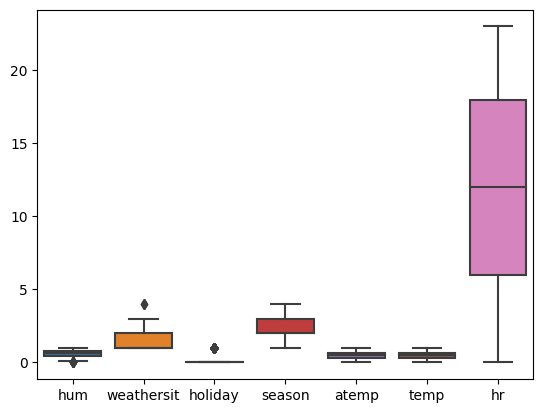

In [22]:
# Membuat subset data tanpa kolom cnt, casual, dan registered
subset_data = df.drop(['cnt','casual', 'registered'], axis=1)

# Membuat boxplot menggunakan seaborn
sn.boxplot(data=subset_data)


Pemeriksaan outlier dilakukan terhadap fitur-fitur yang nantinya digunakan diantaranya, hum, weathersit, holiday, season, atemp, temp, dan hr. Untuk fitur cnt tidak digunakan karena merupakan target / output untuk model machine learning. Sedangkan fitur casual dan registered berdasarkan domain knowledge tidak dibutuhkan karena sudah direpresentasikan dengan fitur cnt

Outlier pada data target (cnt) tidak perlu dihapus saat feature engineering pada machine learning supervised regression. Outlier pada kolom target/label dapat membantu meningkatkan kualitas model regresi.

In [23]:
#Cek outliers pada fitur humidity
cek_outliers(df['hum'])

IQR: 0.31000000000000005
limit_bawah: 0.004999999999999893
limit_atas: 1.245


In [24]:
#Cek humidity tidak diantara limit atas dan limit bawah
df[(df['hum']>1.245) | (df['hum']<0.004999999999999893)].count()['hum']

14

Text(0.5, 1.0, 'Outlier pada humidity')

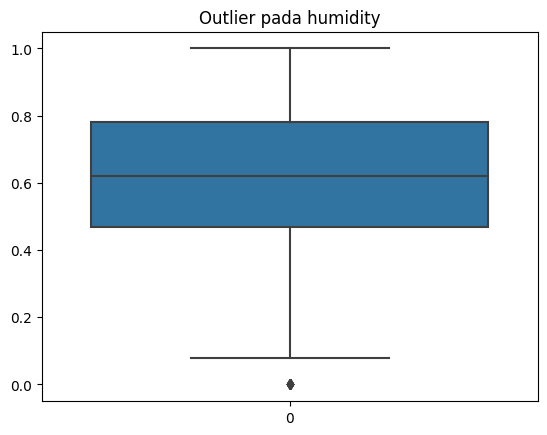

In [25]:
sn.boxplot(df['hum'])
plt.title('Outlier pada humidity')

In [26]:
#Cek outliers pada fitur weathersit
cek_outliers(df['weathersit'])

IQR: 1.0
limit_bawah: -0.5
limit_atas: 3.5


In [27]:
#Cek humidity tidak diantara limit atas dan limit bawah
df[(df['weathersit']>3.5) | (df['weathersit']<-0.5)].count()['weathersit']

3

<AxesSubplot: >

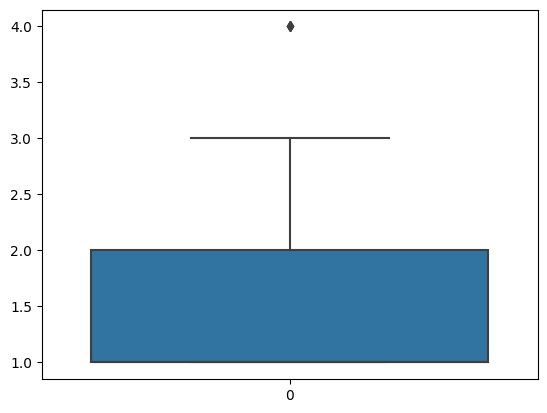

In [28]:
sn.boxplot(df['weathersit'])

In [29]:
#Cek outliers pada fitur weathersit
cek_outliers(df['cnt'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [30]:
# #Cek humidity tidak diantara limit atas dan limit bawah
df[(df['cnt']>645) | (df['cnt']<-323)].count()['cnt']

338

Text(0.5, 1.0, 'Outlier pada cnt')

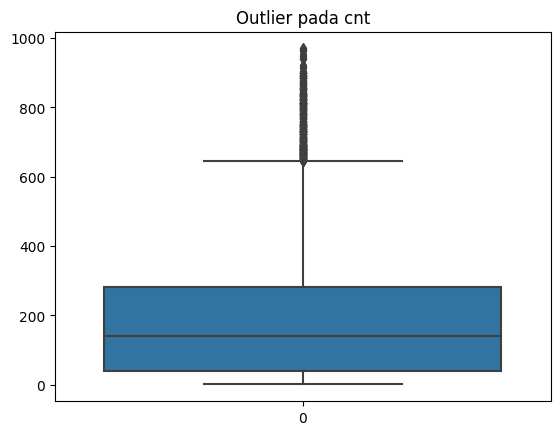

In [31]:
sn.boxplot(df['cnt'])
plt.title('Outlier pada cnt')

In [32]:
#Melakukan filtering pada data outlier
df = df[(df['hum']<=1.245) & (df['hum']>=0.004999999999999893)]


**Conclusion**:
- Data yang dideteksi dan dihapus adalah fitur humidty ('hum') dikarenakan ukuran relative terhadap humidty tidak boleh nol. Dan data outlier tersebut bernilai nol. Maka akan dihapus. [Sumber data Humidty ](http://capitalbikeshare.com/system-datahttps://wgntv.com/weather/can-the-relative-humidity-ever-be-zero-percent/
) 
- meskipun weathersit & holiday memiliki outlier, tetapi outlier tersebut masiih wajar.
- data pada cnt tidak dihapus karena dapat meningkatkan performa model

## **Membuat Kolom Baru & Memperbaiki Format Values Data**

In [33]:
#Mengganti format data tipe 'dteday'
df['dteday'] = pd.to_datetime(df['dteday'], infer_datetime_format=True)

In [34]:
df['dteday'].astype('datetime64[ns]')

0       2011-12-09
1       2012-06-17
2       2011-06-15
3       2012-03-31
4       2012-07-31
           ...    
12160   2012-01-25
12161   2012-07-06
12162   2012-02-20
12163   2012-03-31
12164   2011-04-28
Name: dteday, Length: 12151, dtype: datetime64[ns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   hum         12151 non-null  float64       
 2   weathersit  12151 non-null  int64         
 3   holiday     12151 non-null  int64         
 4   season      12151 non-null  int64         
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hr          12151 non-null  int64         
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  cnt         12151 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.1 MB


In [36]:
#Mengganti format values dari kolom 'weathersit'
df['weathersit'] = df['weathersit'].replace({1: 'Clear'})
df['weathersit'] = df['weathersit'].replace({2: 'Mist'})
df['weathersit'] = df['weathersit'].replace({3: 'Light'})
df['weathersit'] = df['weathersit'].replace({4: 'Heavy'})


In [37]:
#Mengganti format values dari kolom 'season'
df['season'] = df['season'].replace({1: 'Spring'})
df['season'] = df['season'].replace({2: 'Summer'})
df['season'] = df['season'].replace({3: 'Fall'})
df['season'] = df['season'].replace({4: 'Winter'})


In [38]:
#Membuat kolom baru 'month' 'day' 'year'
df['month'] = pd.to_datetime(df['dteday']).dt.month
df['year'] = pd.to_datetime(df['dteday']).dt.year
df['day'] = df['dteday'].dt.strftime('%A')


In [39]:
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,month,year,day
0,2011-12-09,0.62,Clear,0,Winter,0.3485,0.36,16,24,226,250,12,2011,Friday
1,2012-06-17,0.64,Clear,0,Summer,0.5152,0.54,4,2,16,18,6,2012,Sunday
2,2011-06-15,0.53,Clear,0,Summer,0.6212,0.62,23,17,90,107,6,2011,Wednesday
3,2012-03-31,0.87,Mist,0,Summer,0.3485,0.36,8,19,126,145,3,2012,Saturday
4,2012-07-31,0.55,Clear,0,Fall,0.6970,0.76,18,99,758,857,7,2012,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,Clear,0,Spring,0.2273,0.24,7,14,243,257,1,2012,Wednesday
12161,2012-07-06,0.62,Clear,0,Fall,0.7424,0.78,0,39,63,102,7,2012,Friday
12162,2012-02-20,0.60,Mist,1,Spring,0.2121,0.24,5,0,6,6,2,2012,Monday
12163,2012-03-31,0.77,Mist,0,Summer,0.4242,0.42,2,14,55,69,3,2012,Saturday


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   hum         12151 non-null  float64       
 2   weathersit  12151 non-null  object        
 3   holiday     12151 non-null  int64         
 4   season      12151 non-null  object        
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hr          12151 non-null  int64         
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  cnt         12151 non-null  int64         
 11  month       12151 non-null  int64         
 12  year        12151 non-null  int64         
 13  day         12151 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 1.4+ MB


## **Memeriksa Korelasi Antar Variabel & Menghapus Variabel**

Text(0.5, 1.0, 'Korelasi antara variabel-variabel')

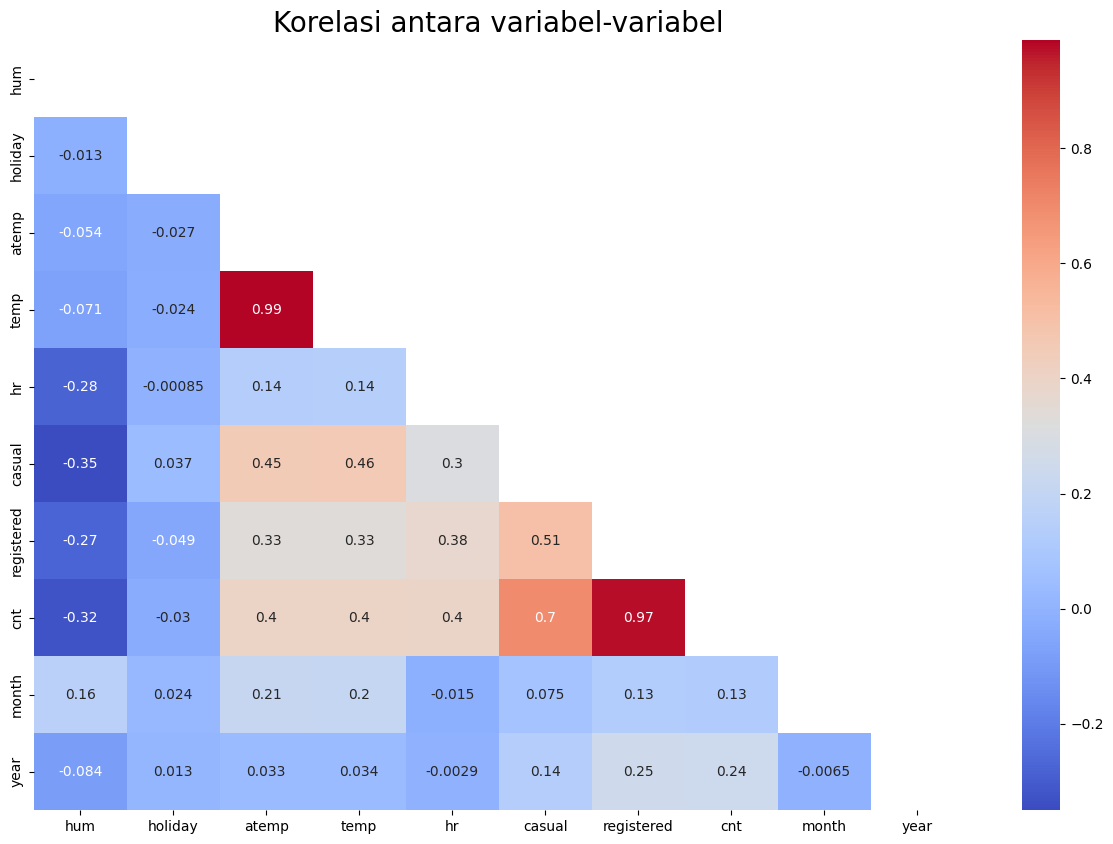

In [41]:
#Plotting matrix korelasi menggunakan sns heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
mask=np.triu(corr_matrix)
sn.heatmap(corr_matrix, annot=True,cmap='coolwarm',mask=mask)
plt.title('Korelasi antara variabel-variabel',size=20)

In [66]:
corr = df.corr()
corr

,hum,holiday,atemp,hr,cnt,month,year
hum,1.000000,-0.012679,-0.054094,-0.281075,-0.324718,0.160628,-0.083954
holiday,-0.012679,1.000000,-0.026977,-0.000863,-0.030460,0.024070,0.012660
atemp,-0.054094,-0.026977,1.000000,0.140763,0.398409,0.210315,0.032936
hr,-0.281075,-0.000863,0.140763,1.000000,0.395459,-0.015330,-0.002971
cnt,-0.324718,-0.030460,0.398409,0.395459,1.000000,0.125209,0.242642
month,0.160628,0.024070,0.210315,-0.015330,0.125209,1.000000,-0.006326
year,-0.083954,0.012660,0.032936,-0.002971,0.242642,-0.006326,1.000000


Correlation matrix menunjukkan bahwa ada beberapa fitur yang memiliki korelasi yang kuat terhadap fitur cnt sebagai target. Korelasi paling tinggi yaitu fitur registered (0.97), casual(0.7), hr(0.4), temp(0.4), atemp(0.4), dan hum(-0.32).  

Variabel "hum" (kelembaban) memiliki korelasi negatif dengan variabel "hr" (jam), "cnt" (jumlah sewa sepeda), dan "month" (bulan). Hal ini menunjukkan bahwa semakin tinggi kelembaban, maka semakin rendah nilai korelasi dengan variabel tersebut.  

Variabel "holiday" (hari libur) memiliki korelasi negatif yang sangat kecil dengan variabel lain, kecuali dengan variabel "cnt" yang memiliki korelasi negatif kecil. Hal ini menunjukkan bahwa variabel "holiday" tidak memiliki korelasi yang signifikan dengan variabel lain dalam dataset.  

Variabel "atemp" (suhu yang dirasakan) memiliki korelasi positif dengan variabel "cnt". Hal ini menunjukkan bahwa semakin tinggi suhu yang dirasakan, semakin tinggi pula jumlah sewa sepeda.  

Variabel "hr" memiliki korelasi positif dengan variabel "cnt". Hal ini menunjukkan bahwa semakin tinggi jam, semakin tinggi pula jumlah sewa sepeda.  

Variabel "month" memiliki korelasi positif dengan variabel "cnt". Hal ini menunjukkan bahwa semakin tinggi bulan, semakin tinggi pula jumlah sewa sepeda.  

Variabel "year" memiliki korelasi positif kecil dengan variabel "cnt". Hal ini menunjukkan bahwa seiring berjalannya waktu, jumlah sewa sepeda juga mengalami peningkatan.

In [42]:
df.drop(['casual', 'temp','registered', 'dteday'], axis=1, inplace=True)

In [43]:
df.shape

(12151, 10)

## **Clean Dataset**

In [44]:
#cek apakah data memiliki NaN values
df.isna().sum()

hum           0
weathersit    0
holiday       0
season        0
atemp         0
hr            0
cnt           0
month         0
year          0
day           0
dtype: int64

In [45]:
#cek duplikasi data
df.duplicated().value_counts()

False    12150
True         1
dtype: int64

In [46]:
#menghapus duplikasi
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

0

In [48]:
df

,hum,weathersit,holiday,season,atemp,hr,cnt,month,year,day
0,0.62,Clear,0,Winter,0.3485,16,250,12,2011,Friday
1,0.64,Clear,0,Summer,0.5152,4,18,6,2012,Sunday
2,0.53,Clear,0,Summer,0.6212,23,107,6,2011,Wednesday
3,0.87,Mist,0,Summer,0.3485,8,145,3,2012,Saturday
4,0.55,Clear,0,Fall,0.6970,18,857,7,2012,Tuesday
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,Clear,0,Spring,0.2273,7,257,1,2012,Wednesday
12161,0.62,Clear,0,Fall,0.7424,0,102,7,2012,Friday
12162,0.60,Mist,1,Spring,0.2121,5,6,2,2012,Monday
12163,0.77,Mist,0,Summer,0.4242,2,69,3,2012,Saturday


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12150 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         12150 non-null  float64
 1   weathersit  12150 non-null  object 
 2   holiday     12150 non-null  int64  
 3   season      12150 non-null  object 
 4   atemp       12150 non-null  float64
 5   hr          12150 non-null  int64  
 6   cnt         12150 non-null  int64  
 7   month       12150 non-null  int64  
 8   year        12150 non-null  int64  
 9   day         12150 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.0+ MB


****

# **Pre Processing Data**

In [50]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error



## **Encoding**
Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.  

Target: Count

Passthrough: Humidity, ATemperature, Hour, Month, Year

OneHotEncoding: Season, Weather, Year

Binary Encoder : Day

In [51]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['season', 'weathersit', 'year']),
    ('Binary', ce.BinaryEncoder(), ['day'])
], remainder='passthrough')


OneHotEncoder digunakan untuk mengubah fitur kategorikal menjadi numerikal dengan cara membuat variabel dummy untuk setiap kategori yang ada pada fitur tersebut. Pada kode di atas, OneHotEncoder digunakan untuk transformasi pada kolom 'season', 'weathersit', dan 'year' karena ketiga kolom tersebut merupakan fitur kategorikal.  

BinaryEncoder digunakan untuk mengubah fitur kategorikal menjadi numerikal dengan mengkonversi setiap kategori menjadi bilangan biner. Pada kode di atas, BinaryEncoder digunakan untuk transformasi pada kolom 'day', karena kolom tersebut juga merupakan fitur kategorikal. Penggunaan BinaryEncoder dibandingkan dengan OneHotEncoder memiliki keuntungan yaitu dapat mengurangi dimensi data yang dihasilkan, sehingga lebih efisien dalam penggunaan memori dan waktu komputasi.

## **Data Spliting**


In [52]:
# Memisahkan data independen variabel dengan target
X = df.drop(['cnt'], axis=1)
y = df['cnt']


## **Train & Split**

In [53]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=2009)

# **Model Implementation**

## **Benchmark Modeling**

In [54]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2009)
rf = RandomForestRegressor(random_state=2009)
xgb = XGBRegressor(random_state=2009)

In [55]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_r2 = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []


# Mencari algoritma terbaik berdasarkan nilai MAE, MAPE, R2
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaling',scaler),
        ('model', i)
    ])
    
    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    #R2
    # R2
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2.mean())

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-110.70153601 -107.45544846 -103.8252319  -106.23668344 -113.62018896] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.38097052 -1.39581031 -1.31020187 -1.40461049 -1.39806988] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.14754959 0.16671286 0.22213981 0.2196449  0.1425582 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-76.20629149 -75.4237765  -75.44645789 -76.8728473  -80.11442546] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-1.11581416 -1.15477521 -1.12499193 -1.16302908 -1.04940618] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[0.55130909 0.

In [56]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'R2' : score_r2
})

,Model,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,R2
0,Linear Regression,-108.367818,3.436361,-1.377933,0.034738,0.179721
1,KNN Regressor,-76.812760,1.735999,-1.121603,0.040184,0.533720
2,DecisionTree Regressor,-44.994748,3.445480,-0.475126,0.037745,0.814921
3,RandomForest Regressor,-34.562219,2.553333,-0.337930,0.028628,0.899405
4,XGBoost Regressor,-29.823606,1.489769,-0.279614,0.016727,0.928073


Terdapat perbedaan cukup signifikan antara nilai MAE, MAPE, dan R2 pada setiap model. Di mana nilai MAE dan MAPE terbaik adalah nilai yang paling kecil. Sedangkan pemilihan nilai R2 didasarkan pada nilai yang paling besar. 

Berdasarkan nilai ketiga matrix tersebut, XGBoost adalah model terbaik. Selanjutnya akan dilakukan prediksi test set dengan model XGBoost

**Penjelasan Singkat XGBoost**

Gradient boosting adalah algoritma supervised learning yang dapat memprediksi variabel target secara akurat dengan mengkombinasikan perkiraan satu set model yang lebih sederhana dan lemah. Saat menggunakannya untuk regresi, pembelajaran yang lemah adalah regression tree, setiap regression tree memetakan input data point ke salah satu daun yang berisi continuous score.

Jika Random forest dapat dianalogikan dengan sekelompok orang yang bermusyawarah untuk membuat keputusan. Masing - masing orang membuat keputusan berdasarkan pengetahuannya. Setelah semua orang membuat keputusan, hasil akhirnya akan dipilih berdasarkan voting terbanyak.

Maka untuk gradient boosting, dapat dianalogikan dengan sekelompok orang dimana setiap orangnya mencoba menyelesaikan kesalahan yang dibuat oleh seseorang yang sebelumnya telah membuat keputusan. Kemudian mereka mencoba menemukan solusi terbaik untuk masalah tersebut.

XGBoost adalah singkatan dari Extreme Gradient Boosting, model ini memiliki kinerja yang baik karena penanganan yang robust (kuat) untuk berbagai jenis tipe data, hubungan, distribusi, dan berbagai hyperparameter yang dapat di tune. XGBoost dapat digunakan untuk regresi, klasifikasi, dan ranking problems.

XGBoost adalah salah satu model dalam supervised machine learning. Objective Function dari XGBoost mengandung fungsi loss dan fungsi regularisasi. Fungsi tersebut merupakan perbedaan antara data aktual dan data prediksi. Model ini merupakan tipe Similar Type Ensemble Method. Di dalam algoritma ini, Decision Tree dibuat dalam bentuk yang sekuensial, yaitu bobot memegang peranan penting dalam XGBoost. Bobot diterapkan kepada semua variabel independen yang nantinya akan dimasukkan ke dalam Decision Tree untuk memprediksi hasil. Bobot dari variabel yang diprediksi akan ditambahkan dan variabel ini akan dimasukkan ke dalam Decision Tree  berikutnya.

## **Testing to data test**

In [57]:
# Benchmark model terbaik
models = {
    'XGB': XGBRegressor(random_state=2009),
}

score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test,y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape,'r2':score_r2}, index=models.keys())
score_before_tuning

,MAE,MAPE,r2
XGB,28.618234,0.448199,0.93827


Ketika dilakukan prediksi pada test set, performa XGBoost juga cukup baik dan tidak memiliki berbedaan signifikan dengan train set. Sehingga, dapat diartikan bahwa model tidak mengalami overfitting atau underfitting.

## **Hyperparameter Tuning**

Selanjutnya, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Berikut ini panduan dan beberapa tips untuk XGBoost Hyperparameter Tuning :

https://xgboost.readthedocs.io/en/latest/parameter.html

https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663



In [58]:

max_depth = list(np.arange(5, 16)) 

learning_rate = list(np.arange(1, 10)/10) 

n_estimators = list(np.arange(100, 300)) 

colsample_bytree = list(np.arange(1, 10)/10) 

subsample = list(np.arange(1, 10)/10)

reg_alpha = list(np.logspace(-1, 1, 10)) 

reg_lambda = list(np.logspace(-1, 1, 10))

gamma = list(np.arange(5, 16)) 

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda': reg_lambda
}

MaxDepth :Kedalaman pohon. Semakin dalam kemungkinan meningkatkan performance, namun juga kompleksitas dan kemungkinan overfit.

Learning rate: Learning rate. Menentukan ukuran step pada tiap iterasi sementara model mengoptimalkan ke arah tujuannya. Learning rate rendah membuat komputasi lebih lambat, dan perlu lebih banyak putaran untuk mencapai pengurangan di residual error yang sama seperti model dengan learning rate tinggi. Namun akan mengoptimalkan peluang untuk mencapai best optimum. Nilainya 0 - 1. Defaultnya 0,3.

n_estimator : Jumlah pohon di ensemble. Ekuivalen dengan total round dari boosting.value integer > 0. Defaultnya 100.

colsample_bytree: Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set). Mewakili kolom yang akan diambil samplenya secara acak untuk tiap tree. Kemungkinan dapat meningkatkan overfitting. value antara 0 - 1. Defaultnya 1.

subsample : Jumlah baris tiap pohon (% dari total baris train set). Mewakili feaction observations yang akan dijadikan sample per tree. Nilai lebih rendah dapat mencegah overfitting tapi bisa menyebabkan underfitting.value antara 0 - 1. Defaultnya 1.

reg_alpha : Alpha. L1 regularization pada weights (Lasso Regression). Dapat meningkatkan speed performance saat featurenya banyak. Semakin besar nilainya, semakin konservatif/simpel modelnya. Defaultnya 0.

reg_lambda : Lambda. L2 regulatization pada weights (Ridge Regression). Dapat menurunkan overfitting. Defaultnya 1.

gamma : Gamma (min_impurity_decrease). Pseudo-regulatization parameter, bergantung pada parameter lainnya. Semakin besar nilainya, semakin konservatif/simpel modelnya. Integer berapapun. Defaultnya 0.

In [59]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2009, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2023 
)

In [60]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)


/Users/ilhamnsh/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/ilhamnsh/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/ilhamnsh/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/ilhamnsh/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/ilhamnsh/opt/anaconda3/lib/python

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['season',
                                                                                'weathersit',
                                                                                'year']),
                                                                              ('Binary',
                

In [61]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -47.65356162137074
Best_params: {'model__subsample': 0.4, 'model__reg_lambda': 1.291549665014884, 'model__reg_alpha': 1.291549665014884, 'model__n_estimators': 185, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__gamma': 6, 'model__colsample_bytree': 0.9}


## **Komparasi Performa**

In [62]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=2009)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = (r2_score(y_test, y_pred_xgb_tuning))

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'r2':r2_xgb_tuning}, index=model.keys())
score_after_tuning


,MAE,MAPE,r2
XGB,27.766109,0.388605,0.941186


In [63]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T


,MAE,MAPE,r2
XGB,28.618234,0.448199,0.93827


Dapat dilihat bahwa setelah dilakukan hyperparameter tuning, model mengalami peningkatan performa.

MAE, MAPE, R2 sebelum tuning: 27.64, 0.38, 0.94 MAE, MAPE, R2 setelah tuning: 28.61, 0.44, 0.93


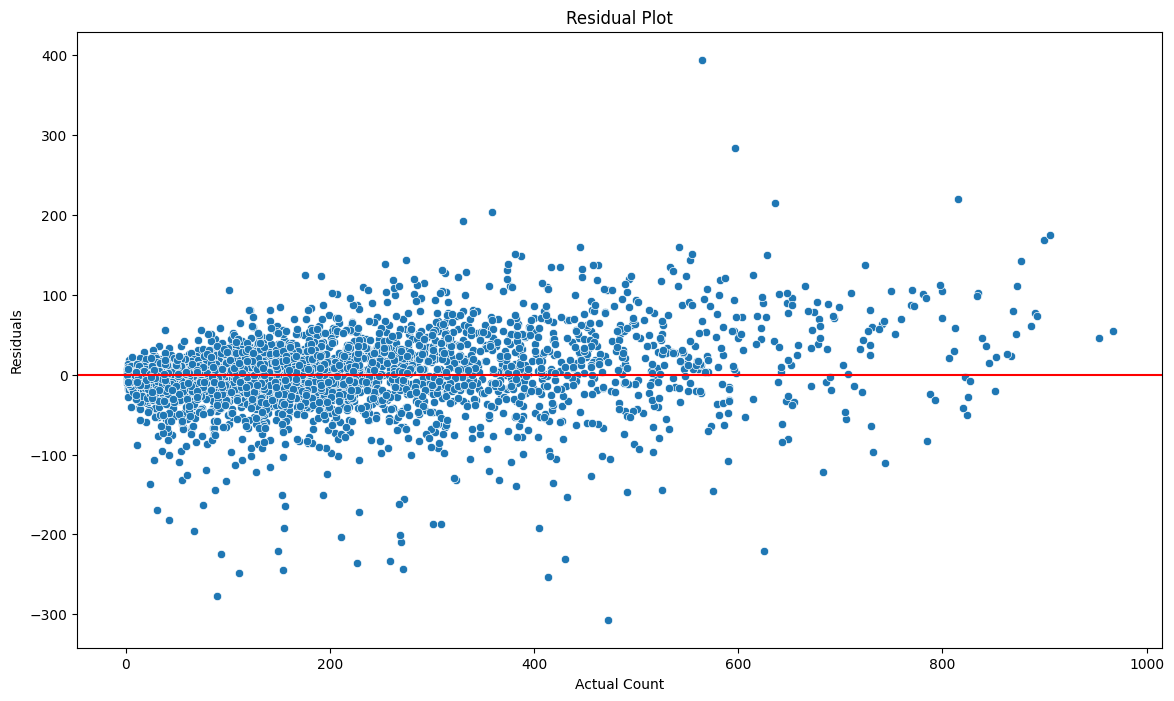

In [64]:
plt.figure(figsize=(14, 8))
y_pred_xgb_tuning = xgb_tuning.predict(X_test)
residuals = y_test - y_pred_xgb_tuning
plot = sn.scatterplot(x=y_test, y=residuals).set(title='Residual Plot', 
                                                 xlabel='Actual Count', 
                                                 ylabel='Residuals')
plt.axhline(y=0, color='red');

Dari scatterplot diatas, terlihat bahwa hasil prediksi yang diperoleh cukup baik. Namun masih terdapat kemungkinan bias.  
Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai MAPE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation)

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (Count), kita dapat mengeceknya melalui function feature_importances_.

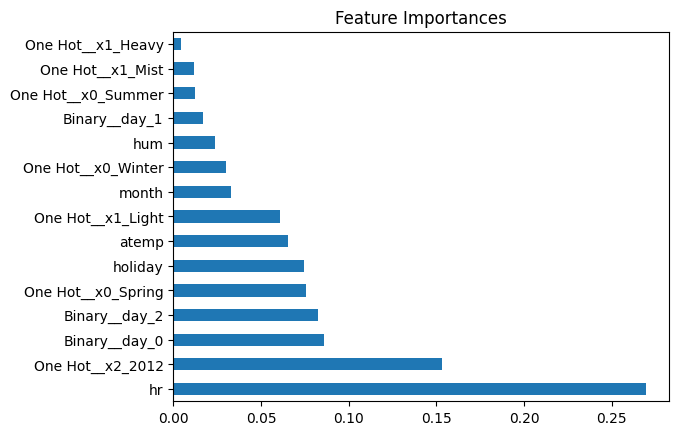

In [65]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');



Berdasarkan pemodelan yang telah dilakukan, fitur 'Hour' merupakan fitur yang paling berpengaruh terhadap 'Count'.

Untuk matriks evaluasi yang digunakan adalah R2, MAE, dan MAPE. Nilai R2 yang dihasilkan setelah hyperparameter tuning adalah 0.94%. Sehingga dapat disimpulkan bahwa 94% data yang diobservasi pada target terlingkup pada model regresi. Nilai MAPE yang dihasilkan setelah hyperparameter tuning adalah 38%. Sehingga dapat disimpulkan bahwa jika model akan digunakan untuk memperkirakan penyewa sepeda pada rentang nilai sesuai model yang dilatih (maksimal Count 970), maka perkiraan penyewa dapat meleset kurang lebih 38 orang dari total aktualnya. Namun dapat terjadi kesalahan lebih jauh juga karena masih terdapat bias yang terlihat dari visualisasi data prediksi dan aktual. Bias dapat terjadi karena masih kurangnya fitur pada dataset untuk merepresentasikan keadaan dimana orang akan memutuskan untuk menyewa sepeda, seperti lokasi station, adanya event tertentu, dan lain - lain.

Rekomendasi yang dapat dilakukan untuk pengembangan model yang lebih baik, seperti :

1. Bias dalam prediksi dihasilkan karena terbatasnya feature pada dataset yang berkaitan dengan Target (jumlah unit sepeda yang disewa) atau yang mampu merepresentasikan keadaan dimana calon pelanggan memutuskan untuk menggunakan jasa peminjamanan seperti lokasi stasiun sepeda terhadap lokasi perkantoran, sekolah, tempat wisata, ruang publik, dll

2. Penambahan data. Jika terdapat data lebih banyak dan lebih dari dua tahun, dapat dianalisis lebih baik lagi keterkaitan tahun dengan Count. Dapat juga digunakan model yang lebih kompleks untuk proses pemodelannya untuk dibandingan dan dicari model dengan error paling sedikit.  

3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.

4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi user experience yang sudah memiliki review. Pembuatan model dengan tujuan seperti ini dapat memanfaatkan data asli rilisan dari BikeSharingCapital (yang bukan diambil dari Kaggle) yang mungkin memiliki kolom 'review' dari customer. Jika memang ada, kita dapat melakukan sentiment analysis untuk mendapatkan insight dari review customer tersebut. 


